In [0]:
from keras import layers
from keras import models

Importantly, a convnet takes as input tensors of shape (image_height, image_width,
image_channels) (not including the batch dimension). In this case, we’ll configure
the convnet to process inputs of size (28, 28, 1), which is the format of MNIST
images. We’ll do this by passing the argument input_shape=(28, 28, 1) to the first
layer.

#### Instantiating a small convnet

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


#### Adding a classifier on top of the convnet

In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)               

### Training the convnet on MNIST images

In [0]:
from keras.datasets import mnist
from keras.utils import to_categorical

#### Load Data

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#### compile and fit model 

In [0]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 44s 915us/step - loss: 0.2054 - acc: 0.9343 - val_loss: 0.0581 - val_acc: 0.9823
Epoch 2/5
48000/48000 [==============================] - 44s 912us/step - loss: 0.0538 - acc: 0.9832 - val_loss: 0.0466 - val_acc: 0.9850
Epoch 3/5
48000/48000 [==============================] - 45s 930us/step - loss: 0.0384 - acc: 0.9878 - val_loss: 0.0392 - val_acc: 0.9883
Epoch 4/5
48000/48000 [==============================] - 44s 921us/step - loss: 0.0286 - acc: 0.9910 - val_loss: 0.0381 - val_acc: 0.9896
Epoch 5/5
48000/48000 [==============================] - 44s 915us/step - loss: 0.0224 - acc: 0.9932 - val_loss: 0.0469 - val_acc: 0.9878


#### evaluate model

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 3s 330us/step


0.989

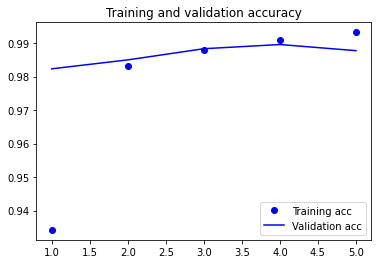

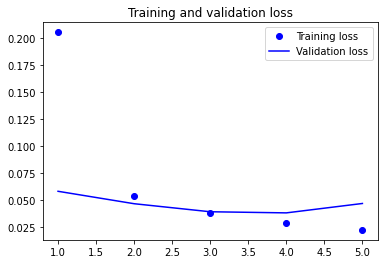

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

** Exercise:  **

Change the activation function and other parameters such as optimizer to see the effect on the network and it's performance.

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 43s 906us/step - loss: 1.0137 - acc: 0.6702 - val_loss: 0.2867 - val_acc: 0.9173
Epoch 2/5
48000/48000 [==============================] - 43s 892us/step - loss: 0.2112 - acc: 0.9378 - val_loss: 0.1371 - val_acc: 0.9580
Epoch 3/5
48000/48000 [==============================] - 43s 897us/step - loss: 0.1226 - acc: 0.9624 - val_loss: 0.0946 - val_acc: 0.9715
Epoch 4/5
48000/48000 [==============================] - 43s 905us/step - loss: 0.0871 - acc: 0.9733 - val_loss: 0.0764 - val_acc: 0.9769
Epoch 5/5
10000/10000 [==============================] - 3s 346us/step


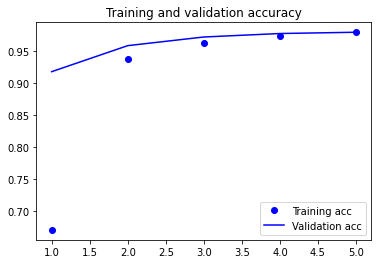

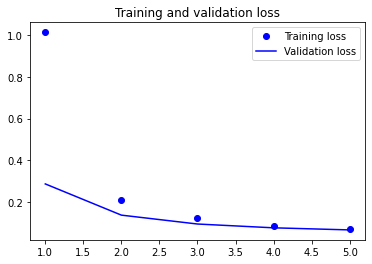

In [0]:
from keras import layers
from keras import models
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt

#copy previous code to avoid destroying old parameters
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 46s 954us/step - loss: 0.1727 - acc: 0.9496 - val_loss: 0.0831 - val_acc: 0.9752
Epoch 2/5
48000/48000 [==============================] - 45s 942us/step - loss: 0.0566 - acc: 0.9824 - val_loss: 0.0559 - val_acc: 0.9843
Epoch 3/5
48000/48000 [==============================] - 45s 947us/step - loss: 0.0395 - acc: 0.9879 - val_loss: 0.0449 - val_acc: 0.9880
Epoch 4/5
48000/48000 [==============================] - 45s 933us/step - loss: 0.0277 - acc: 0.9918 - val_loss: 0.0458 - val_acc: 0.9871
Epoch 5/5
10000/10000 [==============================] - 3s 349us/step


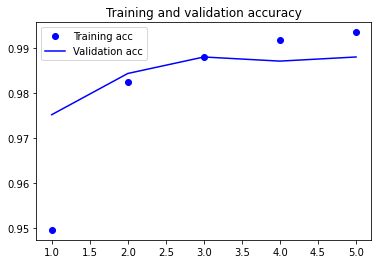

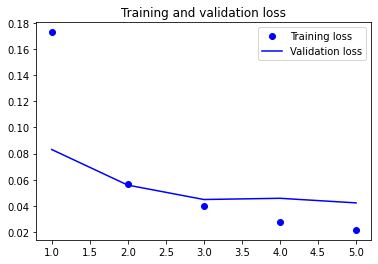

In [0]:
#copy previous code to avoid destroying old parameters
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()